# Variational formulations for inverse problems

So far, we have seen that inverse problems may generally be formulated as a variational problem

```{math}
:label: variational
\min_{u\in\mathcal{U}} J(u),
```

where the *functional* $J : \mathcal{U} \rightarrow \mathbb{R}_{\infty}$ consists of a *data-fidelity* and *regularisation* term. Here, $\mathbb{R}_{\infty} = \mathbb{R} \cup \{\infty\}$ denotes the extended real line and $\mathcal{U}$ is a Banach space.

In this chapter we will discuss how to analyse the well-posedness of {eq}`variational` and lay out the connection between variational problems and PDEs through the *gradient flow*. The contents of this chapter were heavily inspired by the excellent [lecture notes from Matthias J. Ehrhardt and Lukas F. Lang](https://mehrhardt.github.io/data/201803_lecture_notes_invprob.pdf)

---

Some notable examples are highlighted below.

```{admonition} Example: *box constraints*

Given a forward operator $K \in \mathbb{R}^{n\times n}$ we can look for a solution in $[0,1]^n$ by solving a constrained minimisation problem

$$\min_{u\in [0,1]^n} \|Ku - f^\delta\|_2^2.$$

However, this does not fall in the class {eq}`variational` since $[0,1]^n$ is not a vectorspace. To circumvent this we can alternatively express it as

$$\min_{u\in \mathbb{R}^n} \|Ku - f^\delta\|_2^2 + \delta_{[0,1]^n}(u),$$

where $\delta_{\mathcal{C}}$ denotes the [characteristic function](https://en.wikipedia.org/wiki/Characteristic_function_(convex_analysis)) of the set $\mathcal{C}$:

$$\delta_{\mathcal{C}}(u) = \begin{cases} 0 & u \in \mathcal{C} \\ \infty & \text{otherwise}\end{cases}.$$

The corresponding functional $J$ now takes values in the extended real line.
```

```{admonition} Example: *Sobolev regularisation*

Given a bounded linear operator $K:H^1(\Omega)\rightarrow L^2(\Omega)$ and data $f^\delta$, we let $\nabla$ denote the gradient

$$J(u) = \textstyle{\frac{1}{2}}\|Ku-f^{\delta}\|_{L^2(\Omega)}^2 +  \textstyle{\frac{\alpha}{2}}\|\nabla u\|_{L^2(\Omega)}^2.$$

This functional is well-defined for $u \in H^1(\Omega)$, with $H^1(\Omega)$ denoting the [Sobolev space](https://en.wikipedia.org/wiki/Sobolev_space) of functions $u$ for which both $u$ and $\nabla u$ are square integrable. Thus, this type of regularisation generally leads to smooth solutions.
```

```{admonition} Example: *$\ell_1$-regularization*

Consider a forward operator $K:\ell_1 \rightarrow \ell_2$ and let

$$J(u) = \textstyle{\frac{1}{2}}\|Ku - f^\delta\|_{\ell_2}^2 + \alpha \|u\|_{\ell_1}.$$

Such regularisation is often used to promote *sparse* solutions.
```

```{admonition} Example: *Total Variation regularisation*

Consider recovering a function $u: [0,1] \rightarrow \mathbb{R}$ from noisy measurements $f^\delta = Ku + e$. A popular choice in imaging applications is to put an $L^1$-norm on the derivative. For $u\in W^{1,1}([0,1])$ this yields

$$J(u) = \textstyle{\frac{1}{2}}\|Ku-f^{\delta}\|_{L^2([0,1])}^2 + \alpha \|u'\|_{L^1([0,1])}.$$

This can be generalised to include certain discontinuous functions by introducing the space of functions of [bounded variation](https://en.wikipedia.org/wiki/Bounded_variation), denoted by $BV([0,1])$. Functions in $BV([0,1])$ are characterised as having a finite [Total Variation](https://en.wikipedia.org/wiki/Total_variation)

$$TV(u) = \sup_{\phi \in D([0,1],\mathbb{R})} \int_0^1 u(x)\phi'(x)\mathrm{d}x,$$

where $D([0,1],\mathbb{R})$ is the space of smooth compactly supported test functions with $\|\phi\|_{L^\infty([0,1])}\leq 1$. The space $BV([0,1])$ is much larger than $W^{1,1}([0,1])$ as it contains certain discontinuous functions (such as the Heaviside stepfunction) and smaller than $L^1(0,1)$ (which also contains less regular functions). For functions in $W^{1,1}$ we have $TV(u) = \|u'\|_{L^1([0,1])}$.

For a general domain $\Omega \subset \mathbb{R}^d$ with $d\geq 1$, the Total Variation is given by: 

$$TV(u) = \sup_{\phi \in C^{\infty}_c(\Omega, \mathbb{R}^d), \lVert \phi \rVert_{L^p(\Omega)} \leq 1} \int_\Omega u(x) \nabla \cdot \phi(x) \mathrm{d}x,$$

with $C_c(\Omega, \mathbb{R}^d)$ the set of infinitely differentiable compactly supported vector fields with values in $\mathbb{R}^d$ and $1 \leq p \leq \infty$. The $L^p(\Omega)$ norm is given by $\lVert u \rVert_{L^p(\Omega)} := \lVert (\lVert u \rVert_2) \rVert_{L^p(\Omega)}$ For $p = \infty$ and $u \in W^{1,1}(\Omega)$, we have $TV(u) = \lVert \nabla u \rVert_{L^1(\Omega)} := \lVert (\lVert \nabla u \rVert_2) \rVert_{L^1(\Omega)}$.
```

## Analysis

### Existence and uniqueness

To establish existence of minimisers, we first need a few definitions. Firstly, what *is* a minimiser?
```{admonition} Definition: *Minimisers*
:class: important
We say that $\widetilde{u} \in \mathcal{U}$ solves {eq}`variational` iff $J(\widetilde{u}) < \infty$ and $J(\widetilde{u}) \leq J(u)$ for all $u \in \mathcal{U}$.
```

Then, we need some definitions regarding the properties of the functional $J$.

```{admonition} Definition: *Proper functionals*
:class: important

A functional $J$ is called proper if its effective domain $\text{dom}(J) = \{u\in\mathcal{U} \, | \, J(u) < \infty\}$ is not empty.
```

```{admonition} Definition: *Bounded from below*
:class: important

A functional $J$ is bounded from below if there exists a constant $C > -\infty$ such that $\forall u\in \mathcal{U}$ we have $J(u) \geq C$.
```

```{admonition} Definition: *Coercive functionals*
:class: important

A functional $J$ is called coercive if $J(u) \rightarrow\infty$ as $\|u\|_{\mathcal{U}} \rightarrow \infty$.
```

```{admonition} Definition: *Lower semi-continuity*
:class: important

A functional $J$ is lower semi-continuous at $u$ if for every $a < J(u)$ there exists a neighbourhood $\mathcal{X}$ of $u$ such that $a < J(v)$ for all $v \in \mathcal{X}$.

An alternative (slightly weaker) notion is *sequential* lower semi-continuity, which requires that

$$J(u) \leq \lim\inf_{k\rightarrow \infty} J(u_k),$$

for all sequences $\{u_k\}_{k\in\mathbb{N}}$ with $u_k \rightarrow u$ as $k\rightarrow\infty$.

Note that the term *neighbourhood* and the notion of convergence $u_k\rightarrow u$ require the definition an underlying topology, which may be different (in particular, weaker) than the one induced by the norm on $\mathcal{U}$.
```

With these, we can establish existence.

```{admonition} Theorem: *Fundamental theorem of optimisation*
:class: important

Let $J : \mathcal{U} \rightarrow \mathbb{R}$ be proper, coercive, bounded from below and sequential lower semi-continuous. Then $J$ has a minimiser.
```

```{admonition} Proof:
:class: important, dropdown

The first step is to establish the existence of minimising sequences $\{u_k\}_{k\in\mathbb{N}}$, i.e., $J(u_k) \rightarrow \inf_u J(u)$ and showing that these are bounded. We'll use the fact that $J$ is proper, coercive and bounded from below.

Then, we need to establish that there exists a subsequence $\{u_{j_k}\}_{k\in\mathbb{N}}$ of a minimising sequence and a $u_*$ such that $u_{j_k} \rightarrow u_*$. Here, we'll use the underlying topology.

Finally, we use the fact that $J$ is l.s.c. (w.r.t. the chosen topology) to show that $u_*$ is a minimiser.
```

While this theorem is quite general, establishing that $J$ has the required properties can be difficult in practice. In particular, it may involve detailed knowledge of functional analysis in Banach spaces. We will not treat these in general, but instead give some illustrative examples.

````{admonition} Examples: *existence of minimisers in $\mathbb{R}$*

Consider the following functions $J:\mathbb{R}\rightarrow \mathbb{R}$ (cf. {numref}`functionals`):

* $J_1(x) = x^3,$
* $J_2(x) = e^x,$
* $J_3(x) = \begin{cases}x^2 & x < 0 \\ 1 + x & x \geq 0\end{cases}$
* $J_4(x) = \begin{cases}x^2 & x \leq 0 \\ 1 + x & x > 0\end{cases}$

We see that $J_1$ is not bounded from below; $J_2$ is not coercive, $J_3$ is not l.s.c while $J_4$ is.

```{glue:figure} functionals
:figwidth: 500px
:name: "functionals"

Examples of various functions.
```

````

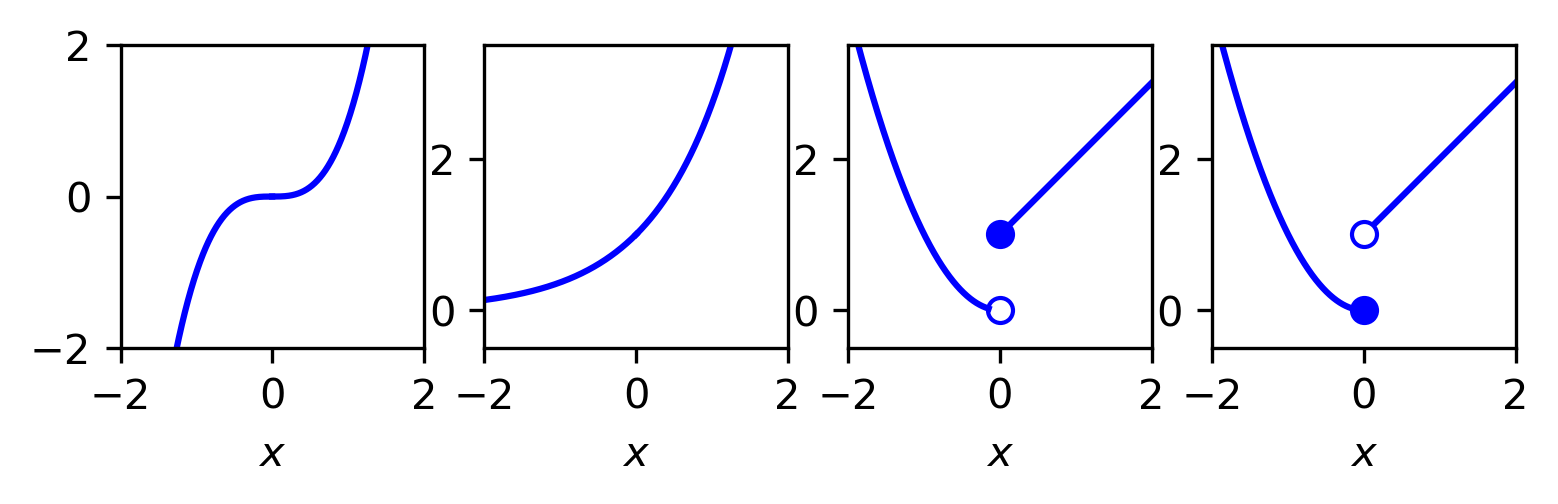

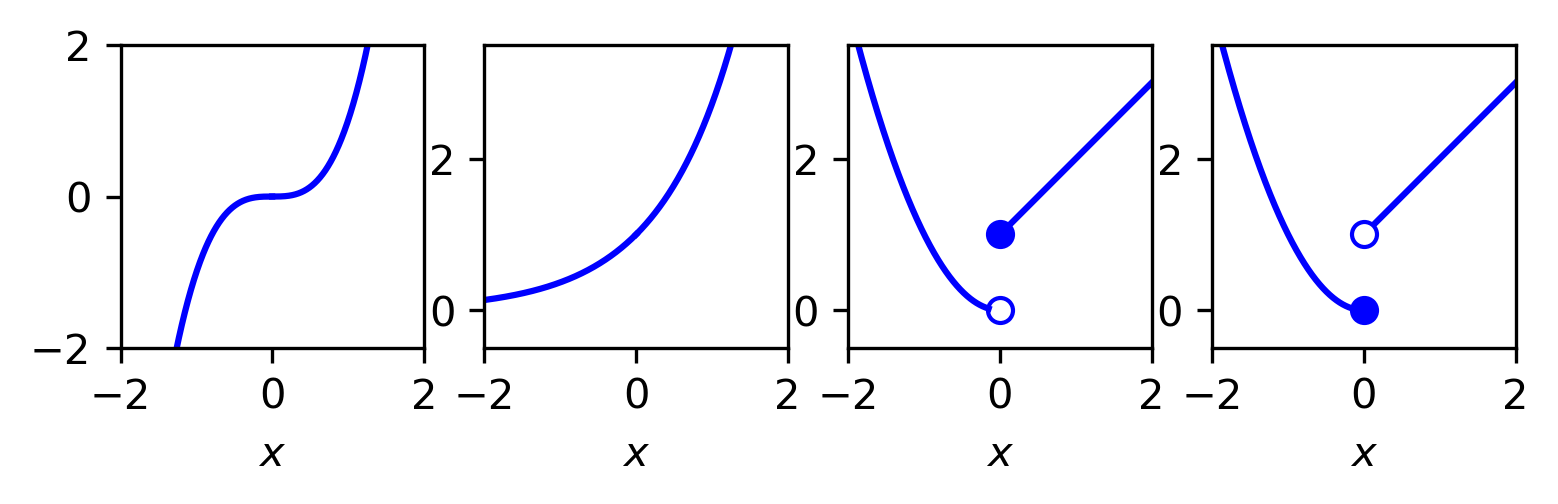

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

from myst_nb import glue

# grid
x = np.linspace(0,5,1000)

# plot
fig,ax = plt.subplots(1,4)

ax[0].plot(-x,-x**3,'b',x,x**3,'b')
ax[0].set_xlim([-2,2])
ax[0].set_ylim([-2,2])
ax[0].set_xlabel(r'$x$')
ax[0].set_aspect(1)

ax[1].plot(-x,np.exp(-x),'b',x,np.exp(x),'b')
ax[1].set_xlim([-2,2])
ax[1].set_ylim([-0.5,3.5])
ax[1].set_xlabel(r'$x$')
ax[1].set_aspect(1)

ax[2].plot(-x[30:],x[30:]**2,'b',x,1+x,'b')
ax[2].plot(0,0,'bo',fillstyle='none')
ax[2].plot(0,1,'bo')
ax[2].set_xlim([-2,2])
ax[2].set_ylim([-0.5,3.5])
ax[2].set_xlabel(r'$x$')
ax[2].set_aspect(1)

ax[3].plot(-x,x**2,'b',x[30:],1+x[30:],'b')
ax[3].plot(0,0,'bo')
ax[3].plot(0,1,'bo',fillstyle='none')
ax[3].set_xlim([-2,2])
ax[3].set_ylim([-0.5,3.5])
ax[3].set_xlabel(r'$x$')
ax[3].set_aspect(1)

glue("functionals", fig, display=False)

```{admonition} Example: *non-coercive least-squares*

Consider $J(u) = \|Ku - f\|_2^2$ with $K : \ell_2 \rightarrow \ell_2$ defined as $(Ku)_i = i^{-1} u_i$
and $f_i = i^{-1}$.

$J$ is not coercive since for the sequence $\{(1,0,0,\ldots),(1,1,0,\ldots), \ldots\}$ we have $\|u_k\|_2 \rightarrow \infty$ but $J(u_k) \rightarrow 0$.

```

```{admonition} Example: *Lower semi-continuity of TV*
The total-variation functional

$$TV(u) = \sup_{\phi \in D([0,1],\mathbb{R})} \int_0^1 u(x)\phi'(x)\mathrm{d}x,$$

is l.s.c. w.r.t. $L^1$. To see this, consider a sequence $\{u_k\}_{k\in\mathbb{N}}$ of functions of bounded variation, with $\|u_k - u\|_{L^1} \rightarrow 0$. Then, for any test function $\phi \in D([0,1],\mathbb{R})$ we have

$$\left|\int_0^1 (u_k(x) - u(x))\phi'(x)\mathrm{d}x\right| \leq \|u_k - u\|_{L^1([0,1])} \|\phi'\|_{L^\infty([0,1])}.$$

Thus

$$TV(u) \leq \lim\inf_{k\rightarrow \infty} TV(u_k),$$

showing that $TV(u)$ is (continuous and hence) indeed l.s.c. w.r.t. $L^1([0,1])$.
```

Having established existence, we can wonder about uniqueness. The following theorem gives a sufficient (but not necessary!) condition for uniqueness.

```{admonition} Theorem: *Uniqueness of minimisers*
:class: important

Let $J$ have at least one minimiser and be [strictly convex](https://en.wikipedia.org/wiki/Convex_function) then the minimiser is unique.
```

```{admonition} Proof:
:class: important, dropdown

Let $u_1, u_2$ be two distinct minimisers; i.e. $J(u_i) \leq J(u) \forall u \in \mathcal{U}$. In particular, we have $J(u_1) \leq J(\alpha u_1 + \beta u_2)$ with $\alpha + \beta = 1$. Because $J$ is strictly convex

$$J(\alpha u_1 + \beta u_2) < \alpha J(u_1) + \beta J(u_2),$$

which would lead to a contradiction: $J(u_1) < J(u_1)$.
```

### Well-posedness of regularised least-squares problems

In this section we focus in particular on variational problems of the form

```{math}
:label: variational_R
\textstyle{\frac{1}{2}}\|Ku - f^\delta\|_{\mathcal{F}}^2 + \alpha R(u),
```

with $K: \mathcal{U} \rightarrow \mathcal{F}$ a bounded linear operator and $R : \mathcal{U} \rightarrow \mathbb{R}_{\infty}$ is proper and l.s.c. (with respect to an appropriate topology).

We can think of {eq}`variational_R` as defining a (possibly non-linear) regularisation scheme $\widetilde{u}_{\alpha,\delta} = K_{\alpha}^\dagger(f^\delta)$ that generalises the pseudo-inverse approach discussed earlier. Note that the notation $K_{\alpha}^\dagger$ is used very loosely to indicate a mapping from $\mathcal{F}$ to $\mathcal{U}$ that is supposed to approximate the inverse of $K$ by solving {eq}`variational_R`. In general, this will be a non-linear mapping.

Conditions under which the operator $K_{\alpha}^\dagger$ is well-defined and continuous can be stated quite generally. Similarly, conditions under which the regularised solution converges to the usual pseudo-inverse solution can be stated. This goes beyond the scope of these lecture notes. The interested reader is referred to [the lecture notes from Matthias J. Ehrhardt and Lukas F. Lang](https://mehrhardt.github.io/data/201803_lecture_notes_invprob.pdf).

% ```{admonition} Theorem: *Existence and uniqueness of regularised least-squares solutions*
%
% Let $K$ be injective *or* $R$ be strictly convex, then the variational problem {eq}`variational_R` has % a unique minimiser.
%
% ```
%
% ```{admonition} Proof:
% :class: important, dropdown
%
% ...
% ```
%
% ```{admonition} Theorem: *Stability of regularised least-squares solutions*
%
% Let $\alpha > 0$, then the operator $K_{\alpha}^\dagger$, defined as the solution operator to % {eq}`variational_R`, is continuous.
%
%```
%
%```{admonition} Proof:
%:class: important, dropdown
%
%...
%```
%
%```{admonition} Theorem: *Convergence of regularised least-squares solutions*
%
%The solution $\widetilde{u}_{\alpha,\delta} = K_{\alpha}^\dagger(f^\delta)$ converges to the regular %minimum-norm solution as $\alpha \rightarrow 0$.
%
%```
%
%```{admonition} Proof:
%:class: important, dropdown
%
%...
%```

### Examples


```{admonition} Example: *Tikhonov regularisation in $\mathbb{R}^n$*

Let

$$J(u) = \textstyle{\frac{1}{2}}\|Ku - f^\delta\|_2^2 + \textstyle{\frac{\alpha}{2}}\|u\|_2^2.$$

Here, $J$ is obviously bounded from below and proper. To show that $J$ is coercive, we note that $J(u) \geq \textstyle{\frac{\alpha}{2}}\|u\|_2^2$ and hence that $J(u) \rightarrow \infty$ as $\|u\|_2 \rightarrow \infty$. To show that $J$ is l.s.c., we will show that $J$ is continuous since this implies l.s.c. First note that

$$J(u + d) = J(u) + \textstyle{\frac{1}{2}}\|Kd\|_2^2 - \langle Kd,Ku - f^\delta \rangle + \textstyle{\frac{\alpha}{2}}\|d\|_2^2 + \alpha \langle d,u\rangle,$$

from which we can bound

$$|J(u+d) - J(u)| \leq A \|d\|_2^2 + B \|d\|_2.$$

Now, for every $\epsilon$ we can pick a $\delta$ such that $\|d\|_2 < \delta$ implies that $|J(u+d) - J(u)| < \epsilon$.

Finally, we can show that $J$ is *strongly convex* with constant $\alpha$ by showing that $J(u) - \textstyle{\frac{\alpha}{2}}\|u\|_2^2$ is convex. The fact that $\|Ku - f^\delta\|_2^2$ is convex follows easily from the triangle inequality and the fact that the function $(\cdot)^2$ is convex.

```

```{admonition} Example: *$\ell_1-regularisation$*

Consider

$$J(u) = \textstyle{\frac{1}{2}}\|Ku - f^\delta\|_{\ell_2}^2 + \alpha \|u\|_{\ell_1},$$

with $K : \ell_2 \rightarrow \ell_2$ a bounded operator. Again, we can easily see that $J$ is bounded from below.

Note that the regularised solution is determined for all $f^\delta \in \ell_2$, regardless of the Picard condition.

```

```{admonition} Example: *Sobolev regularisation*
Consider

$$J(u) = \textstyle{\frac{1}{2}}\|Ku - f^\delta\|_{L^2(\Omega)}^2 + \textstyle{\frac{\alpha}{2}}\|\nabla u\|_{L^2(\Omega)}^2.$$
```

```{admonition} Example: *Total variation regularisation*

Let

$$J(u) = \textstyle{\frac{1}{2}}\|Ku - f^\delta\|_{L^2(\Omega)}^2 + \alpha TV(u).$$

```


## Derivatives

Having established well-posedness of {eq}`variational`, we now focus our attention to characterising solutions through the first-order optimality conditions.

````{admonition} Definition: *Fréchet derivative*
:class: important

We call a functional $J:\mathcal{U}\rightarrow \mathbb{R}$ Fréchet differentiable (at $u$) if
there exists a linear operator $D$ such that


```{math}
:label: frechet
\lim_{h\rightarrow 0} \frac{|J(u+h) - J(u) - Dh|}{\|h\|_{\mathcal{U}}} = 0.
```

If this operator exists for all $u \in\mathcal{U}$ we call $J$ Fréchet differentiable and denote its Fréchet derivative by $J': \mathcal{U} \rightarrow \mathcal{U}^*$. Here, $\mathcal{U}^*$ denotes the [dual space](https://en.wikipedia.org/wiki/Dual_space) of $\mathcal{U}$ which consists of bounded linear functionals on $\mathcal{U}$.
````

With this more general notion of differentiation we can pose the first-order optimality conditions.

````{admonition} Definition: *First-order optimality condition*
:class: important

Let $u_*$ be a local extremum of $J$, and let $J$ be Fréchet-differentiable at $u_*$, then

```{math}
:label: local_extremum
J'(u_*) = 0.
```

````

```{admonition} Example: *Tikhonov regularisation on \mathbb{R}^n*
...
```

Note that in some important cases $J$ may fail to be Fréchet differentiable at the solution. We will treat this case in more detail in the next chapter on numerical methods.

```{admonition} Example: *$\ell_1$-regularisation on \mathbb{R}^n*
...
```

---

A well-known method for solving {eq}`variational` is the *Landweber* iteration

$$u_{k+1} = u_k - \lambda J'(u_k),$$

where $\lambda > 0$ denotes the stepsize. Under certain conditions on $J'(u)$ and $\lambda$ one can show that this converges to a stationary point $u_{*}$ for which $J'(u_*) = 0$. Obviously, this method only applies when $J'(u)$ is well-defined everywhere along the solution path.

---

It turns out that we can make an important distinction between *smooth* and *convex* (non-smooth) functionals.
We will explore optimality conditions and algorithms for these two classes in more detail in a later chapter.

## The Euler-Lagrange equations

An alternative viewpoint on optimality is provided by the Euler-lagrange equations, which establishes the link between certain problems of the form {eq}`variational` and PDEs. In particular, we focus in this section on functionals of the form

```{math}
:label: J_denoising
J(u) = \int_{\Omega} {\textstyle{\frac{1}{2}}} \left(u(x) - f^\delta(x)\right)^2 + r(\nabla u(x)) \mathrm{d}x,
```
with $\Omega \subset \mathbb{R}^n$ and $r : \mathbb{R}^n \rightarrow \mathbb{R}$. Such problems occur for example in image-denoising applications. We will see later that such problems also occur as subproblems when solving more general problems of the form {eq}`variational_R`.

```{admonition} Theorem: Euler-Lagrange equations
:class: important

Let $J$ be a functional of the form {eq}`J_denoising`. Then the Euler-Lagrange equations are given by

$$u(x) - \nabla \cdot \left(\nabla r(\nabla u(x))\right) = f^\delta(x),$$

with boundary condition $\nabla r( \nabla u) \cdot n = 0$. Here $n(x)$ denotes the normal at $x \in \partial \Omega$ and $\nabla r$ denotes the gradient with respect to its argument (and not with respect to $x$). The solution to this PDE is a stationary point of the functional $J$.

It is commonly expressed as an evolution equation

$$\partial_t u(t,x) + u(t,x) - \nabla \cdot \left(\nabla r(\nabla u(t,x))\right) = f^\delta(x),$$

whose solution tends to a stationary point of $J$ as $t \rightarrow \infty$.
```

```{admonition} Proof
:class: dropdown

Let $u_*$ be stationary point of $J$, and introduce

$$\phi(t) = J(u_* + t v),$$

then $\phi'(0) = 0$ for all $v$. In this case we have

$$\phi(t) = \int_{\Omega} \textstyle{\frac{1}{2}}\left(u + t v - f^\delta\right)^2 + r(\nabla u + t \nabla v),$$

and hence

$$\phi'(0) = \int_{\Omega} (u - f^\delta)v + \nabla r(\nabla u)\cdot\nabla v.$$

Applying [Green's first identity](https://en.wikipedia.org/wiki/Green%27s_identities#Green's_first_identity) yields

$$\int_{\Omega} \left(u(x) - f^\delta(x) - \nabla \cdot \left( \nabla r(\nabla u(x))\right)\right) v(x) \mathrm{d}x + \left.v(x)\nabla r( \nabla u(x))\cdot n(x)\right|_{\Omega}.$$

Since it should hold for all $v$, we obtain the desired PDE. The boundary term involves $\nabla r( \nabla u) \cdot n$, so this imposes $\nabla r( \nabla u) \cdot n = 0$.
```

````{admonition} Example: *The heat equation*

Let

$$r(v) = \|v\|_2^2.$$

The corresponding diffusion equation is given by

$$\partial_t u + u - \alpha\nabla^2 u = f^\delta.$$

A forward Euler discretisation of the PDE leads to

$$u_{k+1} = u_k - \Delta t \left(f^\delta - u + \alpha \nabla^2 u\right),$$

which is in fact a Landweber iteration applied to the corresponding objective.

```{glue:figure} linear_diffusion
:figwidth: 500px
:name: "linear_diffusion"

Example of denoising with linear diffusion.
```

````

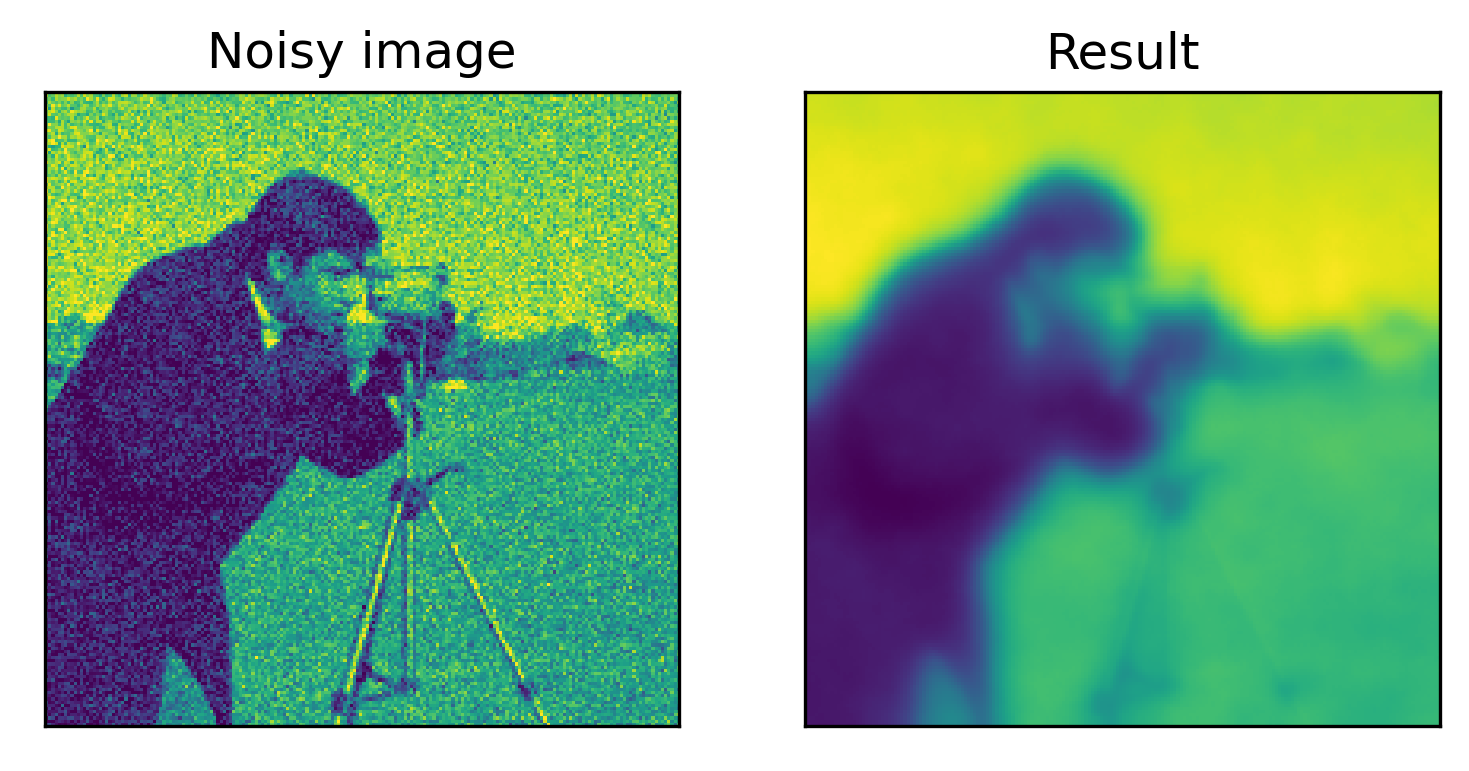

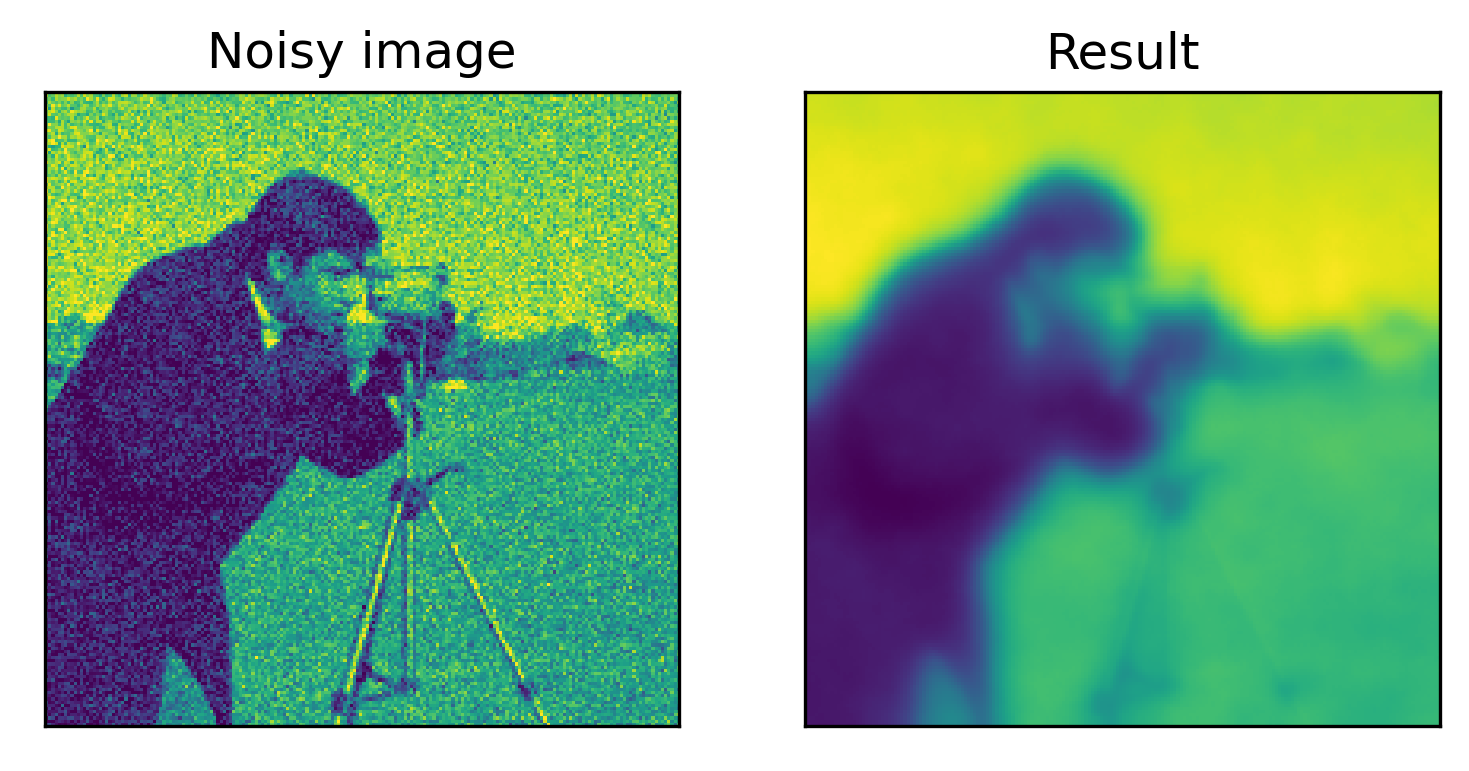

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

from myst_nb import glue

from skimage import data
from skimage.util import random_noise
from skimage.transform import resize

# parameters
sigma = 0.1
alpha = 1
dt = 1e-6
niter = 1001
n = 200
coeff = lambda s : 1 + 0*s

# diffusion operator
def L(u,coeff = lambda s : 1 + 0*s):
    ue = np.pad(u,1,mode='edge') # padd edges to get array of size n+2 x n+2

    # diffusion coefficient (central differences)
    grad_norm = ((ue[2:,1:-1] - ue[:-2,1:-1])/(2/n))**2 + ((ue[1:-1,2:] - ue[1:-1,:-2])/(2/n))**2
    c = np.pad(coeff(grad_norm),1,mode='edge')

    # diffusion term (combination of forward and backward differences)
    uxx = ((c[1:-1,1:-1] + c[2:,1:-1])*(ue[2:,1:-1]-ue[1:-1,1:-1]) - (c[:-2,1:-1]+c[1:-1,1:-1])*(ue[1:-1,1:-1]-ue[:-2,1:-1]))/(2/n**2)
    uyy = ((c[1:-1,1:-1] + c[1:-1,2:])*(ue[1:-1,2:]-ue[1:-1,1:-1]) - (c[1:-1,:-2]+c[1:-1,1:-1])*(ue[1:-1,1:-1]-ue[1:-1,:-2,]))/(2/n**2)

    return uxx + uyy

# noisy image
f = resize(data.camera(),(n,n))
f_delta = random_noise(f,var=sigma**2)

# solve evolution equation
u = np.zeros((n,n))

for k in range(niter-1):
    u = u - dt*(u - alpha*L(u,coeff)) + dt*f_delta

# plot
fig,ax = plt.subplots(1,2)

ax[0].imshow(f_delta)
ax[0].set_title('Noisy image')
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(u)
ax[1].set_title('Result')
ax[1].set_xticks([])
ax[1].set_yticks([])

glue("linear_diffusion", fig, display=False)

````{admonition} Example: *Non-linear diffusion*

Let

$$r(v) = \log(1 + \|v\|_2^2/\epsilon^2),$$

which leads to the Perona-Malik diffusion equation:

$$\partial_t u + u - \alpha\nabla \cdot \left(\frac{\nabla u}{1 + \epsilon^{-2}\|\nabla u\|_2^2}\right) = f^\delta.$$

We can interpret intuitively why this would preserve edges by looking at the diffusion coefficient. Wherever $\|\nabla u\| \ll \epsilon$ we have linear diffusion, if $\|\nabla u\| \gg \epsilon$, we hardly have any diffusion. This intuition is confirmed by considering the penalty $r(s)$, which for small $s$ behaves like $s^2$ but then flattens out and will thus not increasingly penalise larger gradients.

```{glue:figure} perona_malik
:figwidth: 500px
:name: "perona_malik"

Example of denoising with Perona-Malik regularisation.
```
````

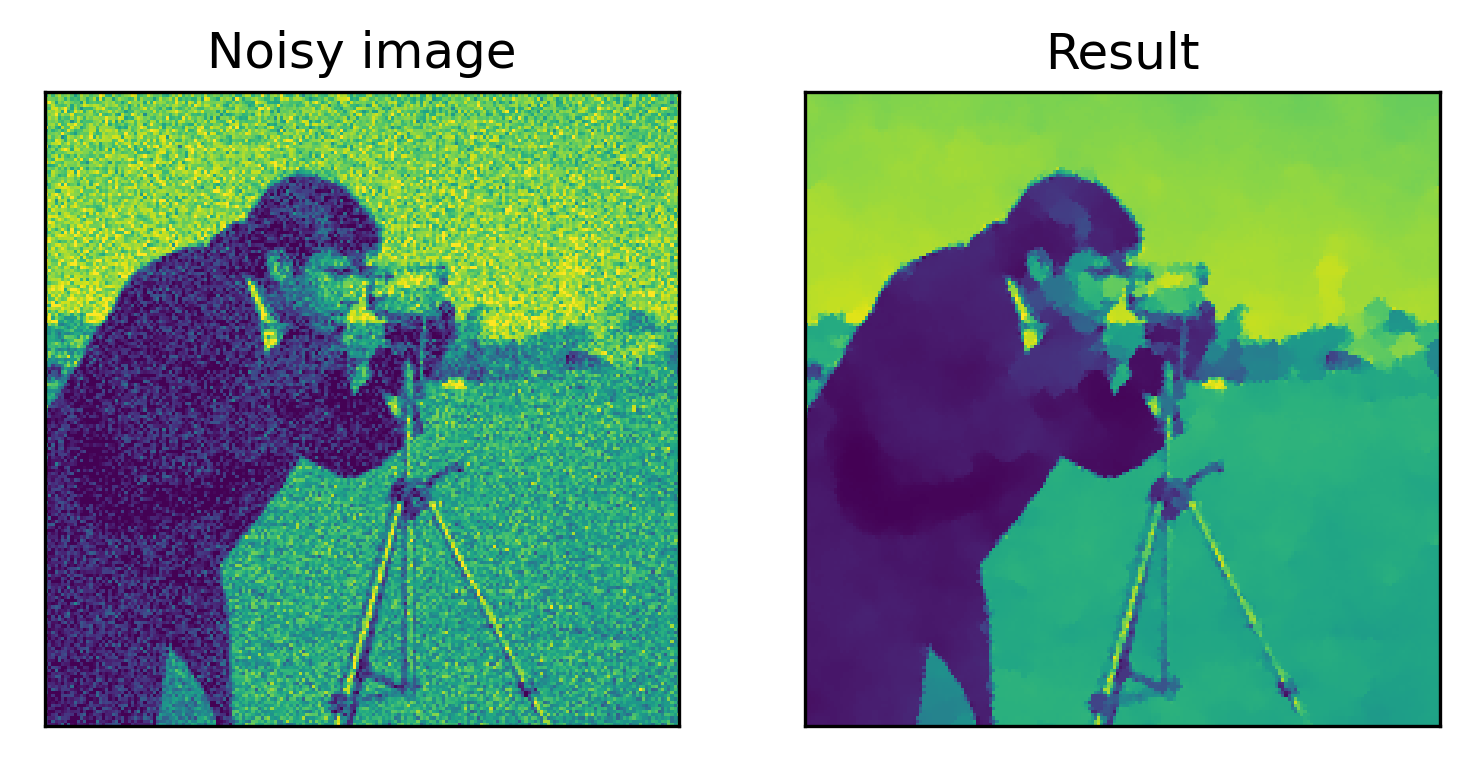

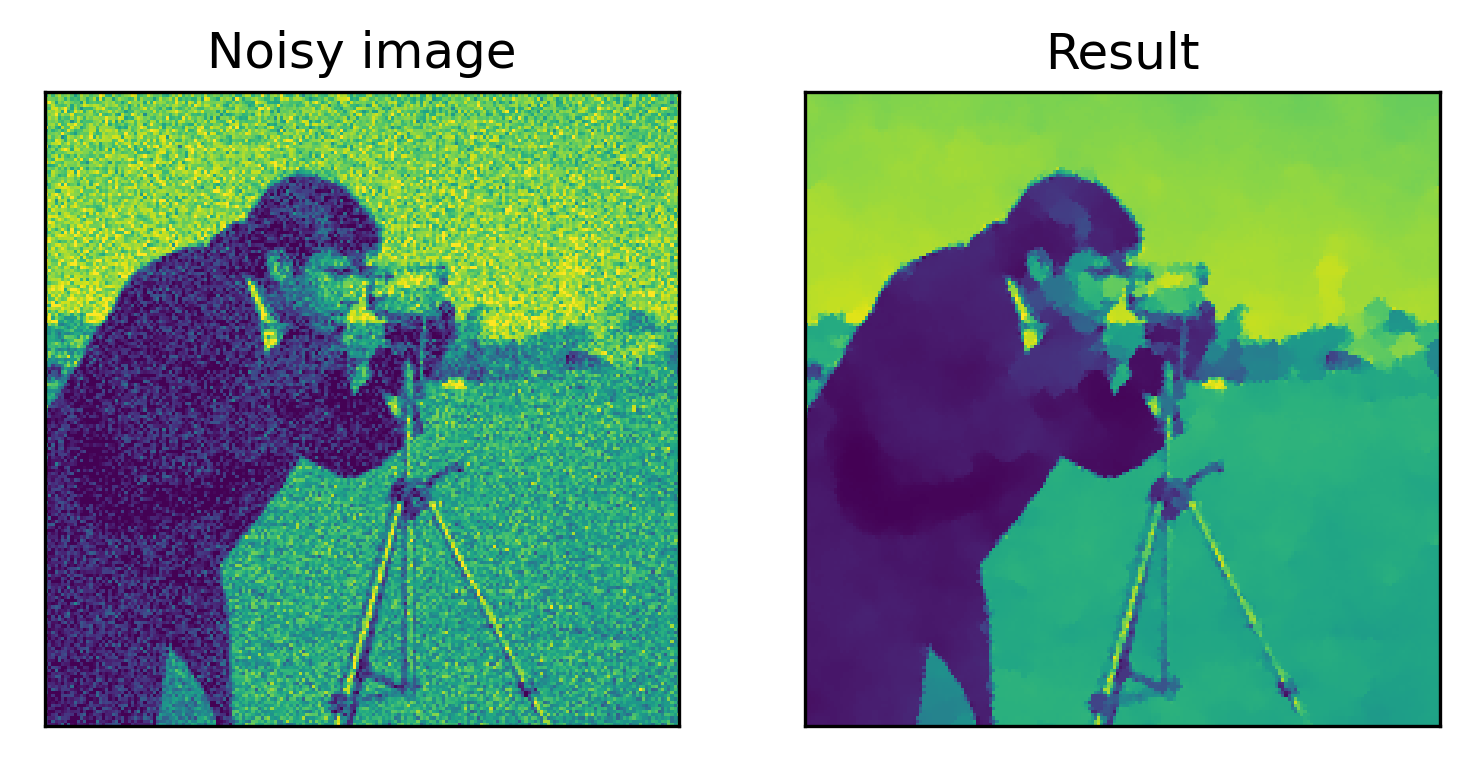

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

from myst_nb import glue

from skimage import data
from skimage.util import random_noise
from skimage.transform import resize

# parameters
sigma = 0.1
alpha = 1
dt = 1e-6
niter = 1001
n = 200
coeff = lambda s : 1/(1+1e6*s)

# diffusion operator
def L(u,coeff = lambda s : 1):
    ue = np.pad(u,1,mode='edge') # padd edges to get array of size n+2 x n+2

    # diffusion coefficient (central differences)
    grad_norm = ((ue[2:,1:-1] - ue[:-2,1:-1])/(2/n))**2 + ((ue[1:-1,2:] - ue[1:-1,:-2])/(2/n))**2
    c = np.pad(coeff(grad_norm),1,mode='edge')

    # diffusion term (combination of forward and backward differences)
    uxx = ((c[1:-1,1:-1] + c[2:,1:-1])*(ue[2:,1:-1]-ue[1:-1,1:-1]) - (c[:-2,1:-1]+c[1:-1,1:-1])*(ue[1:-1,1:-1]-ue[:-2,1:-1]))/(2/n**2)
    uyy = ((c[1:-1,1:-1] + c[1:-1,2:])*(ue[1:-1,2:]-ue[1:-1,1:-1]) - (c[1:-1,:-2]+c[1:-1,1:-1])*(ue[1:-1,1:-1]-ue[1:-1,:-2,]))/(2/n**2)

    return uxx + uyy

# noisy image
f = resize(data.camera(),(n,n))
f_delta = random_noise(f,var=sigma**2)

# solve evolution equation
u = np.zeros((n,n))

for k in range(niter-1):
    u = u - dt*(u - alpha*L(u,coeff)) + dt*f_delta

# plot
fig,ax = plt.subplots(1,2)

ax[0].imshow(f_delta)
ax[0].set_title('Noisy image')
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(u)
ax[1].set_title('Result')
ax[1].set_xticks([])
ax[1].set_yticks([])
glue("perona_malik", fig, display=False)

## Exercises

### Well-posedness and optimality conditions

The following functionals are given (for $\alpha > 0$ and $A \in \mathbb{R}^{2 \times 2}$ an invertible matrix):

* $J_1: \mathbb{R} \rightarrow \mathbb{R}, u \mapsto \frac{1}2(u-f)^2 + \alpha|u|$
* $J_2: \mathbb{R} \rightarrow \mathbb{R}, u \mapsto |u-f| + \alpha u^2$
* $J_3: \mathbb{R}^2 \rightarrow \mathbb{R}, u \mapsto \frac{1}2\Vert A u - f\Vert_{\ell^2}^2  + \alpha \Vert u \Vert_{\ell^2}$

Show that a minimum exists (use the fundamental theorem of optimisation) and that it is unique.

### Fréchet derivatives

Let $\Omega \subset \mathbb{R}^2$ and $\Sigma \subset \mathbb{R}^2$. Compute the Fréchet derivatives of the following functionals:

* $J(u) = \frac{1}{2} \left\| \nabla u \right\|_{L^2(\Omega)}^2$ where $u \in W^{1,2}(\Omega)$.

```{admonition} Answer
:class: tip, dropdown

We have $J(u + h) = \textstyle{\frac{1}{2}}\|\nabla u + \nabla h\|^2 = \textstyle{\frac{1}{2}}\|\nabla u\|^2 +  \int_{\Omega}\nabla u(x) \cdot \nabla h(x) \mathrm{d}x + \textstyle{\frac{1}{2}}\|\nabla h\|^2$. This suggests that $DJ(u) : U \rightarrow \mathbb{R}$ can be defined as $DJ(u)v = \int_{\Omega}\nabla u(x) \cdot \nabla v(x) \mathrm{d}x$. Indeed, we can verify that

$$
\lim_{\|h\|\rightarrow 0} \frac{\left| \int_{\Omega}\nabla h (x) \cdot \nabla h(x)\mathrm{d}x \right|}{\sqrt{\int_{\Omega} |h(x)|^2 + |\nabla h(x) \cdot \nabla h(x) | \mathrm{d}x}} = 0.
$$
```

* $J(u) = \frac{1}{2} \left\| Ku-f \right\|_{L^2(\Sigma)}^2$ where $K: L^2(\Omega) \rightarrow L^2(\Sigma)$ is a compact linear operator, $u : \Omega \rightarrow \mathbb{R}$ and $f : \Sigma \rightarrow \mathbb{R}$.

```{admonition} Answer
:class: tip, dropdown

We have $J(u+h) = J(u) + \langle Ku - f, Kh \rangle + \textstyle{\frac{1}{2}}\|Kh\|^2.$ This suggests letting $DJ(u)v = \langle Ku - f, Kh\rangle = \langle K^*(Ku - f), h\rangle$. Indeed

$$
\lim_{\|h\|\rightarrow 0}\frac{\|Kh\|^2_{L^2}}{\|h\|_{L^2}} = 0,
$$

because $K$ is bounded.
```

* $J(\mathbf{v}) = \frac{1}{2} \left\| \partial_t f + \nabla\cdot(f \mathbf{v}) \right\|_{L^2(\Omega \times [0,T])}^2$
	where $f$ here represents an image sequence, i.e. $f: \Omega \times [0,T] \rightarrow \mathbb{R}$, and $\mathbf{v}$ denotes a desired vector field, i.e. $\mathbf{v}: \Omega \times [0,T] \rightarrow \mathbb{R}^2$. We assume each component of $v$ satisfies $v_i(\cdot, t) \in W^{1,2}(\Omega)$.

```{admonition} Answer
:class: tip, dropdown

Here, we have $J(\mathbf{v} + \mathbf{h}) = J(\mathbf{v}) + \langle \partial_t f + \nabla \cdot (f\mathbf{v}),  \nabla \cdot (f\mathbf{h})\rangle_{L^2(\Omega \times [0,T])} + \textstyle{\frac{1}{2}}\|\nabla \cdot (f\mathbf{h})\|_{L^2(\Omega \times [0,T])}^2$, suggesting

$$
DJ(\mathbf{v})\mathbf{h} = \int_0^T \int_{\Omega} \left(\partial_t f(x,t) + \nabla \cdot (f(x,t)\mathbf{v}(x,t))\right)\left(\nabla \cdot (f(x,t)\mathbf{h}(x,t))\right) \mathrm{d}t\mathrm{d}x.
$$
```

### High-order diffusion

Consider the following denoising problem

$$\min_u \textstyle{\frac{1}{2}}\|u - f^\delta\|^2_{L^2([0,1])} + \textstyle{\frac{\alpha}{2}} \|u''\|_{L^2([0,1])}^2.$$

* Show that the solution to

$$\partial_t u(t,x) + u(t,x) + \alpha \partial_x^4 u(t,x) = f^\delta(x),$$

with boundary conditions $\partial_x u = \partial_{xxx}u = 0$, satisfies the optimality conditions of the variational problem as $t\rightarrow \infty$ .

* Design an explicit finite-difference scheme to solve the diffusion equation and implement it in Python.

* Test it on noisy data: $f^\delta(x) = \exp(-10^2(x-1/2)^2) + \epsilon$, with $\epsilon \sim N(0,\sigma^2)$.


````{admonition} Answer
:class: tip, dropdown

* Introduce $\phi(t) = J(u + tv)$. Then

$$\phi'(0) = \int_0^1 v(x)(u(x) - f^\delta(x))\mathrm{d}x + \alpha \int_0^1 u''(x) v''(x)\mathrm{d}x.$$

Integrating by parts, the optimality condition $\phi'(0) = 0$ reads

$$ \int_0^1 v(x)(u(x) + \alpha u''''(x) - f^\delta(x))\mathrm{d}x + \text{boundary terms}.$$

Since it should hold for all $v$, we get the desired result.

* We use a central FD in space and Forward Euler in time:

$$u^{(k+1)} = u^{(k)} + \Delta t \left(f^\delta - u^{(k)} - \alpha D u^{(k)}\right),$$

with $D$ the finite-difference matrix. An overview of the coefficients for central FD are found [here](https://en.wikipedia.org/wiki/Finite_difference_coefficient). For the central grid-points we have

$$u''''(i\cdot \Delta x) \approx (u_{i-2} - 4u_{i-1} + 6u_i - 4u_{i+1} + u_{i+2})/(\Delta x)^2,$$

for $i = 0, 1, \ldots, n-1$. For $i=0$ and $i=1$ we eliminate $u_{-2}$ and $u_{-1}$ using the boundary conditions:

$$-(1/2)u_{-2} + u_{-1} - u_1 + (1/2)u_2 = 0,$$

$$(1/2)u_{-1} - (1/2)u_1 = 0.$$

We do the same for $i = n-2$ and $i=n-1$.

* Running the code for $\Delta x = 10^{-2}$, $\Delta t = 10^{-8}$, $\alpha = 10^{-2}$ on noisy data $f^\delta(x) = \exp(-10^2(x-1/2)^2) + \epsilon$, with $\epsilon \sim N(0,\sigma^2)$, $\sigma=10^{-01}$ gives the following result.

```{glue:figure} fourth_order
:figwidth: 600px
:name: "fourth_order"

Example of denoising with fourth order diffusion.
```

````

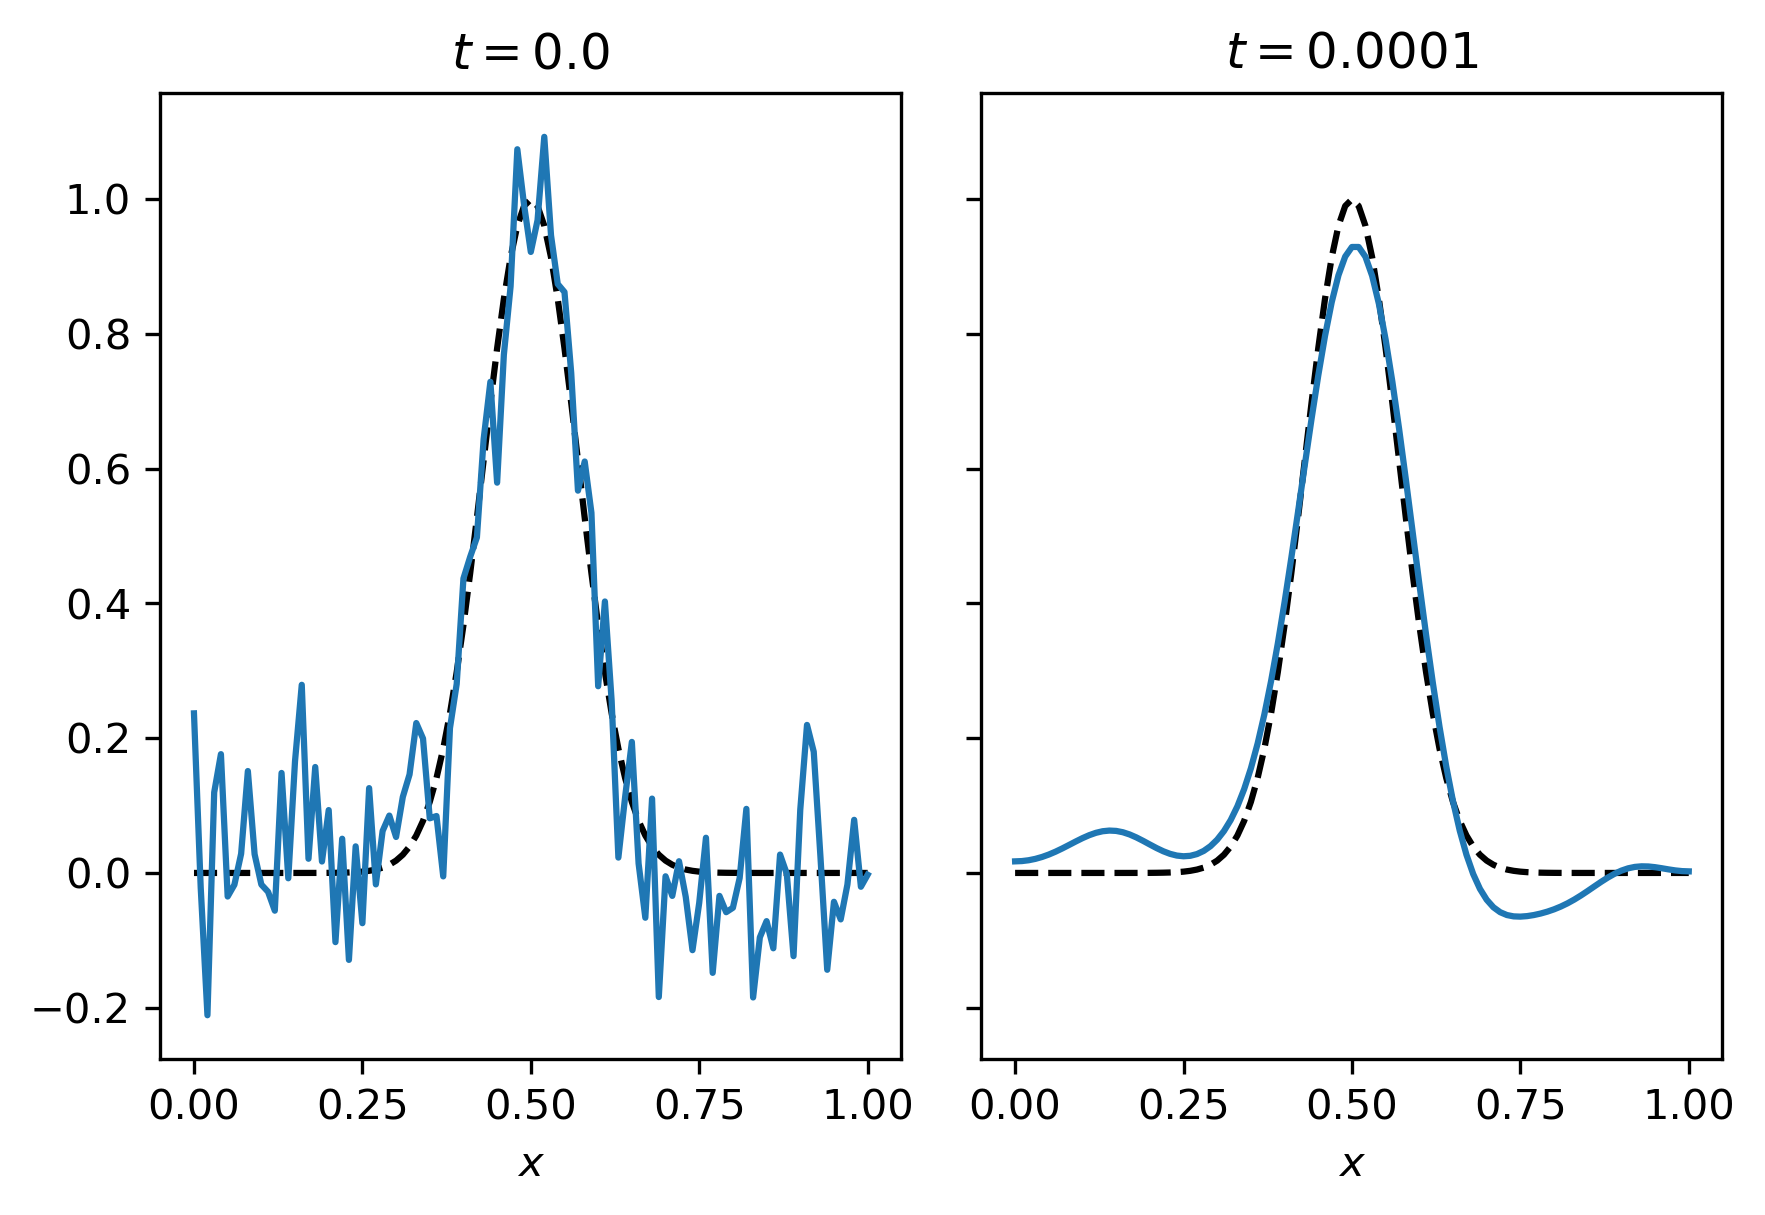

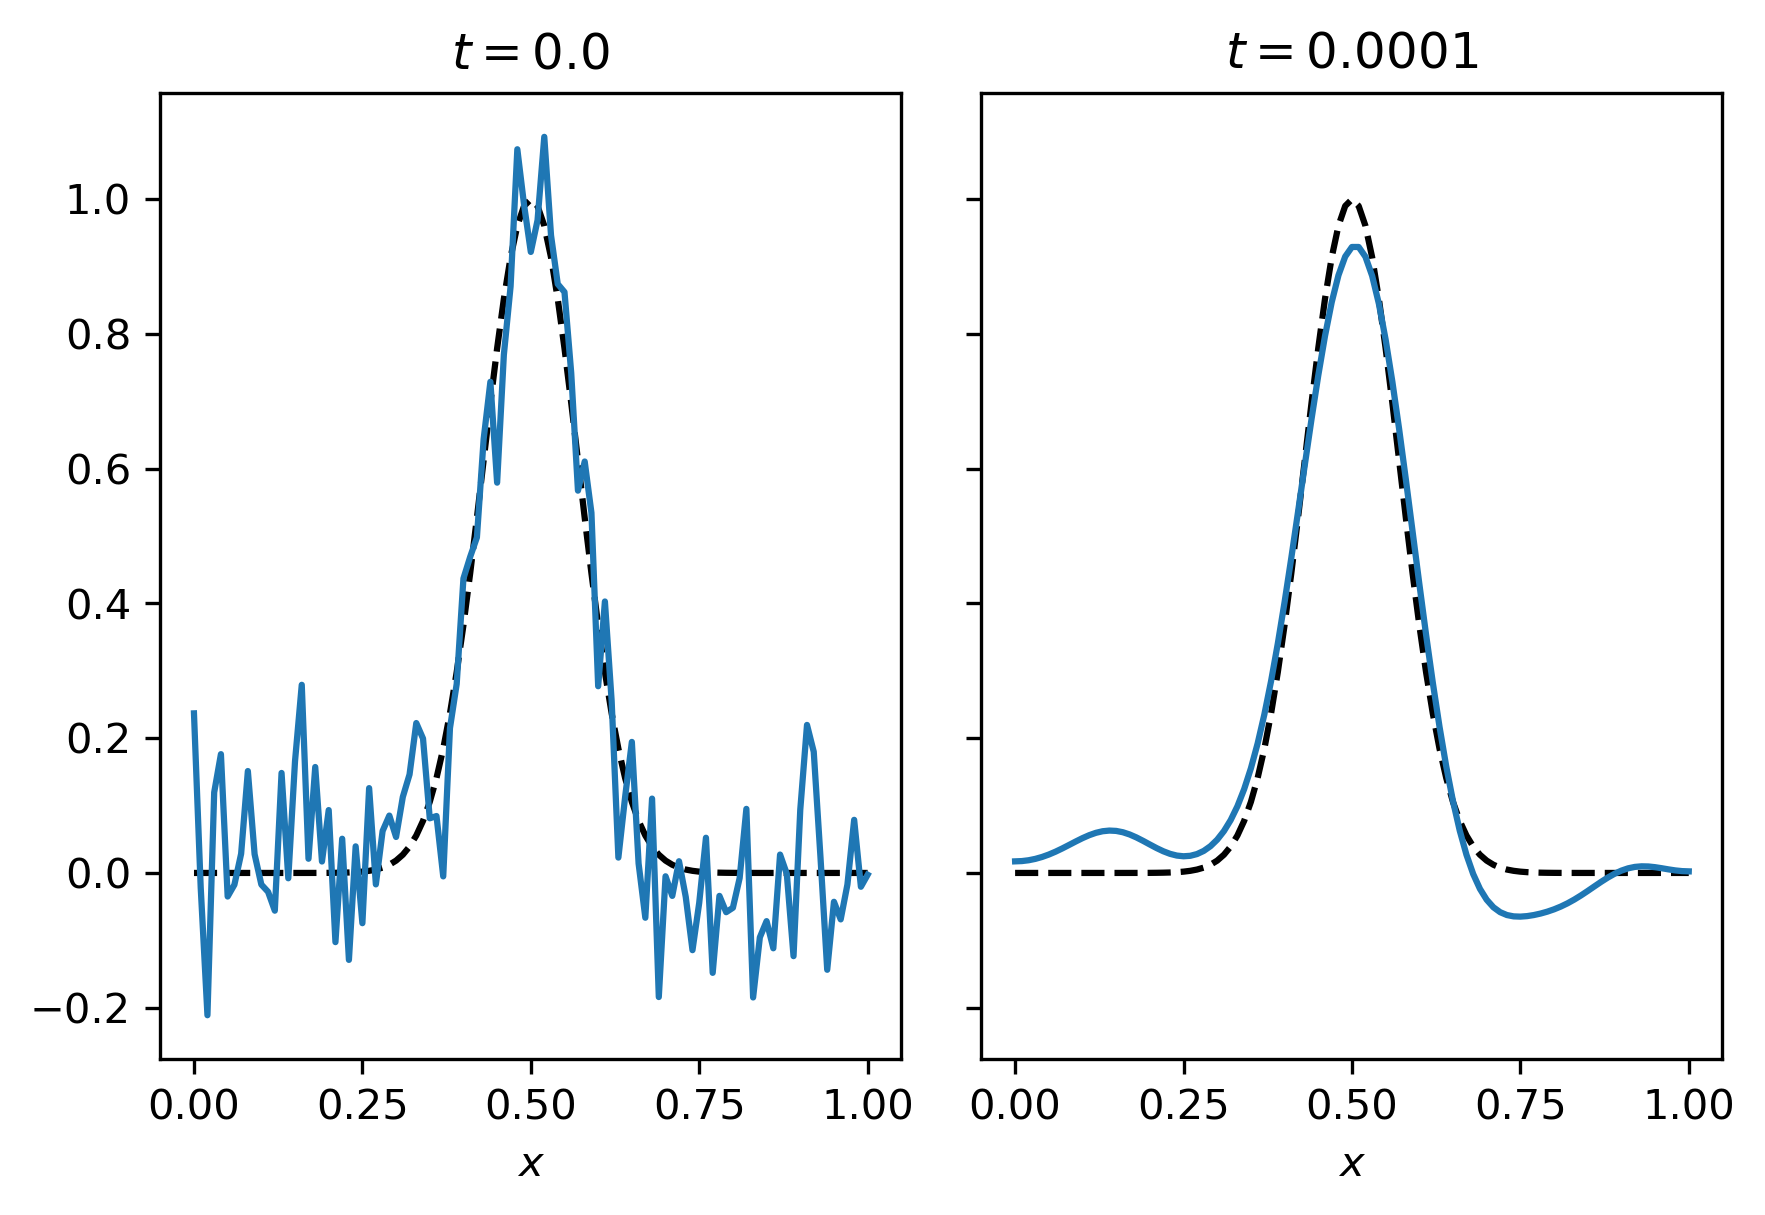

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

from scipy.sparse import dia_matrix
from myst_nb import glue

def getD(n,h):
    e = np.ones(n)
    D = (1/h**4)*dia_matrix((np.array([e, -4*e, 6*e, -4*e, e]), np.array([-2,-1,0,1,2])), shape=(n, n)).toarray()

    D[0,:3] = [6/h**4,-8/h**4,2/h**4]
    D[1,:4] = [-4/h**4,7/h**4,-4/h**4,1/h**4]
    D[-2,-4:] = [1/h**4,-4/h**4,7/h**4,-4/h**4]
    D[-1,-3:] = [2/h**4,-8/h**4,6/h**4]
    return D


# parameters
nx = 101
dx = 1/(nx-1)
dt = 1e-8
nt = 10001
sigma = 1e-1
alpha = 1e-2

# operator
D = getD(nx,dx)

# ground truth and data
x = np.linspace(0,1,nx)
u_true = np.exp(-1e2*(x-.5)**2)
f_delta = u_true + sigma*np.random.randn(nx)

# solve
u = np.zeros((nt,nx))
u[0] = f_delta

for k in range(nt-1):
    u[k+1] = u[k] - dt*(u[k] + alpha*D@u[k] - f_delta)

# plot
index = [0, nt-1]
fig,ax = plt.subplots(1,len(index),sharey=True)
for k in range(len(index)):
    ax[k].plot(x,u_true,'k--')
    ax[k].plot(x,u[index[k]])
    ax[k].set_title('$t = $' + str(index[k]*dt))
    ax[k].set_xlabel('$x$')
    ax[k].set_aspect(1)
fig.tight_layout()

glue("fourth_order", fig, display=False)

## Assignments

### Total variation


* Derive the non-linear diffusion equation corresponding to the TV-denoising problem in $\Omega = [0,1]^2$ and design a numerical scheme method to solve it. You can assume that $u$ is sufficiently regular. 
* Test your method on the cameraman image and compare it to the Perona-Malik approach.